K nearest neighbhor is a classification method to copy your neighbhors' behavior. It could be used as a simple baseline model to compare more advanced models with.

Let's create our own toy example. 

Creating the data:
(Notice that generally the scale matters when we have different units in our data)

1

Let's create a board and throw darts on it.

	- Throw 1000 darts in the rectangle [0, 20] X [0,25]
	-  Split the rectangle to 4 equal parts.
		- Use axvline and axhline 
	-  We are going to uniformaly hit each part. If we 		hit the top left, we label the point with 70% 		red, and with equal chances blue, green and 		balck. Choose the dominant color for the other 		parts.
	-  Save both the point (x, y) position and its 		label (color) to a list ('pt_li').
	- Plot the board

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

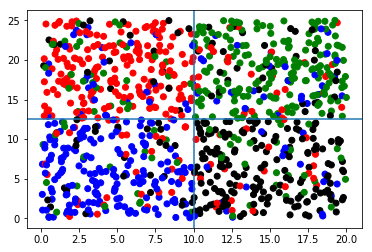

In [81]:
np.random.seed(42)
x = np.random.rand(1000) * 20
y = np.random.rand(1000) * 25
labels = [] * 1000


for x_i, y_i in zip(x, y):
    if x_i < 10:
        if y_i > 12.5:
            color = np.random.choice(['red', 'blue', 'green', 'black'],
                                     p=[0.7, 0.1, 0.1, 0.1])
        else:
            color = np.random.choice(['red', 'blue', 'green', 'black'], 
                                     p=[0.1, 0.7, 0.1, 0.1])
    else:
        if y_i > 12.5:
            color = np.random.choice(['red', 'blue', 'green', 'black'], 
                                     p=[0.1, 0.1, 0.7, 0.1])
        else:
            color = np.random.choice(['red', 'blue', 'green', 'black'], 
                                     p=[0.1, 0.1, 0.1, 0.7])
    labels.append(color)
    
    
plt.axvline(x=10)
plt.axhline(y=12.5)
plt.scatter(x, y, c=labels)

2

Imagine you were to create a function to calculate distances by yourself. For each new point (test) you would need to calculate the distance to all points, sort them in ascending order, choose the first k, and assign a label accordingly. This is a very expensive computation. Luckily there are cool algorithms to make this process faster. 

(If interested explore for example https://www.cs.cmu.edu/~ckingsf/bioinfo-lectures/kdtrees.pdf) 

- we are just going to use ready made KNN functions.
- Split the data to validation folds.

Use:

```
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier

```

In [25]:
from sklearn.neighbors import KNeighborsClassifier

kcn = KNeighborsClassifier(n_neighbors=4)

result = kcn.fit(np.array(list(zip(x, y))), labels)
result.score(np.array(list(zip(x, y))), labels)


0.726

3

It's up to you to use cross validation to find the best K. Try only the options 1-5.

In [80]:
from sklearn.model_selection import train_test_split

In [82]:
X_train, X_test, Y_train, Y_test = train_test_split(
    np.array(list(zip(x, y))), labels, test_size=0.2, )

X_train.shape, X_test.shape, len(Y_train), len(Y_test)

n_iters = 1000
for k in range(1, 6):
    acc_sum = 0
    for _ in range(n_iters):
        kcn = KNeighborsClassifier(n_neighbors=k)
        result = kcn.fit(X_train, Y_train)
        acc_sum += sum(result.predict(X_test) == Y_test) / len(Y_test)
    acc = acc_sum / n_iters
    print('k: {} - accuracy = {}'.format(k, acc))

k: 1 - accuracy = 0.5950000000000151
k: 2 - accuracy = 0.5149999999999899
k: 3 - accuracy = 0.6200000000000039
k: 4 - accuracy = 0.6699999999999943
k: 5 - accuracy = 0.6749999999999952


In [83]:
best_kcn = KNeighborsClassifier(n_neighbors=5)
best_result = best_kcn.fit(X_train, Y_train)
Y_hat = best_kcn.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
best_kcn.classes_

array(['black', 'blue', 'green', 'red'], dtype='<U5')

In [86]:
cm = confusion_matrix(Y_test, Y_hat)
print(cm)

[[33  5  5  4]
 [ 9 35  4  2]
 [ 8  4 29  1]
 [ 5 10  8 38]]


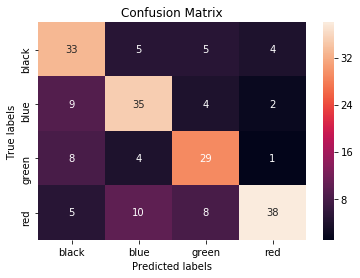

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(best_kcn.classes_); ax.yaxis.set_ticklabels(best_kcn.classes_);

4

Throw 15 new darts uniformaly on the board and label them. Plot it! Does it work? 

5

What is your accuracy?

6

Can you draw a confusion matrix? 
     